# Data Scientist Nanodegree Program -- Introduction to Data Science

## Project : Write a Data Science Blog Post
Thiago Viturino Damasceno - From Brazil

### 1) Pick a dataset. >> Data Source >> https://www.kaggle.com/atulanandjha/temperature-readings-iot-devices

This dataset contains the temperature readings from IOT devices installed outside and inside of an anonymous Room (say - admin room). The device was in the alpha testing phase. So, It was uninstalled or shut off several times during the entire reading period ( 28-07-2018 to 08-12-2018). This random interval recordings and few mis-readings ( outliers) makes it more challanging to perform analysis on this data. Let's see, what you can present in the plate out of this messy data.


### 2) Pose at least three questions related to business or real-world applications of how the data could be used.

    1 ) Did the equipment collect the data in the same amount each month?

    2 ) What is the hottest period ?

    3 ) What was the coldest day in the data collection period ?


### 3) Create a Jupyter Notebook, using any associated packages you'd like, to:

In [357]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing libraries.

In [382]:
df = pd.read_csv( r'C:\Users\thiag\Desktop\Data Setes\IOT\IOT-temp.csv') # Importing the data into CSV.

In [383]:
df = df.sort_values(by='noted_date') # Ordering the dataFrame based on the Data column.

In [384]:
df['Index'] = df['id'].apply(lambda x: str(x)[20:26])
df['Year'] = df['noted_date'].apply(lambda x: str(x)[6:10])
df['Month'] = df['noted_date'].apply(lambda x: str(x)[3:5])
df['Time'] = df['noted_date'].apply(lambda x: str(x)[12:13])
df['Date'] = df['noted_date'].apply(lambda x: str(x)[0:10])

# Dividing the 'noted_date' column into year and month.

In [385]:
df.drop('room_id/id', axis=1, inplace=True) # Taken out of unnecessary columns >> The Room column has only one Value;
df.drop('id', axis=1, inplace=True) # Removed unnecessary columns >> The column id has been split;
df.drop('noted_date', axis=1, inplace=True) #Removed unnecessary columns >> The column noted_date has been split

In [386]:
df['Season'] = np.where(df['Month'] <= '03', 'Winter', 
                     np.where(df['Month'] <= '06', 'Spring',
                              np.where(df['Month'] <= '10', 'Summer',
                                       np.where(df['Month'] <= '12', 'Autumn',''))))

 # Adding a new seasons column.                                     

In [387]:
df['Month'] = pd.to_numeric(df["Month"]) # Converting types from the cell.

In [388]:
df.rename(columns={'out/in': 'Place', 'temp': 'Temp'}, inplace = True) # Renaming Columns

In [389]:
def hourstiming(x):
    if x in ['9', '8', '7', '6', '5']:
        timing = 'Morning'
    else:
        timing = 'Night'
    return timing

# Creating a conditional function to define whether it is morning or night.

In [390]:
df['Day Part'] = df['Time'].apply(hourstiming)


# Creating a new column based on the function 'hourstiming'

In [391]:
df = df[['Index','Date', 'Year', 'Month', 'Time','Day Part', 'Season','Place','Temp']] # Rearranging Columns

In [392]:
np.sum(df.isnull()) # Confirming if the dataframe has null values.

Index       0
Date        0
Year        0
Month       0
Time        0
Day Part    0
Season      0
Place       0
Temp        0
dtype: int64

In [393]:
df.head(10) # Data Frame is Ready for Analysis

,Index,Date,Year,Month,Time,Day Part,Season,Place,Temp
16218,126924,01-11-2018,2018,11,0,Night,Autumn,In,32
16217,146101,01-11-2018,2018,11,0,Night,Autumn,Out,40
16216,111262,01-11-2018,2018,11,0,Night,Autumn,Out,39
16215,147650,01-11-2018,2018,11,0,Night,Autumn,Out,40
16214,139505,01-11-2018,2018,11,0,Night,Autumn,Out,40
16213,127981,01-11-2018,2018,11,0,Night,Autumn,Out,40
16212,139627,01-11-2018,2018,11,0,Night,Autumn,Out,41
16211,129490,01-11-2018,2018,11,0,Night,Autumn,Out,40
16210,132487,01-11-2018,2018,11,0,Night,Autumn,Out,39
16209,141401,01-11-2018,2018,11,0,Night,Autumn,Out,41


### Analyzing and Answering questions

#### 1 ) Did the equipment collect the data in the same amount each month?

In [394]:
df.groupby("Month").count()['Temp'] # Counting the samples collected per month.

Month
7       154
8      2241
9     42740
10    36252
11     8607
12     7612
Name: Temp, dtype: int64

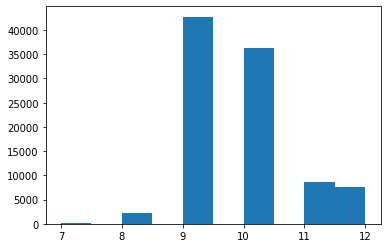

In [395]:
plt.hist(df['Month']); # Plotting a Histogram to demonstrate more clearly the collection made by the temperature sensor.

 #### Conclusion One >> 
 
As demonstrated, the collection was carried out in a moderate way in the first two months, fearing a significant increase in the third and fourth months, following a drastic reduction in the last two months.

======================================================================================================

#### 2 ) What is the hottest period ?

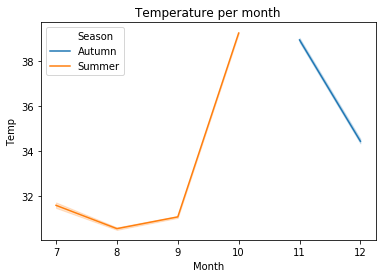

In [396]:
sns.lineplot(df['Month'],df['Temp'],hue=df['Season']); 
plt.title('Temperature per month'); 

# Plot to show how the temperature was for each month

In [397]:
df.groupby("Month").mean()['Temp'] # Average monthly temperature

Month
7     31.571429
8     30.531013
9     31.056060
10    39.265310
11    38.956663
12    34.433789
Name: Temp, dtype: float64

In [398]:
df.groupby("Day Part").mean()['Temp'] # Average temperature per day.

Day Part
Morning    35.308546
Night      34.861641
Name: Temp, dtype: float64

In [399]:
df.groupby("Day Part").max()['Temp'] # Maximum temperature reached per day

Day Part
Morning    51
Night      50
Name: Temp, dtype: int64

 #### Conclusion Two >> 
 
The hottest period was in months 10 and 11 (summer). 
The temperature rises more in the summer outside, reaching 51 ° in the month 10. 

======================================================================================================


#### 3 ) What was the coldest day in the data collection period ?

In [400]:
df.min() # Lowest temperature recorded in the collection period, to confirm what was the lowest temperature recorded.

Index           100004
Date        01-11-2018
Year              2018
Month                7
Time                 0
Day Part       Morning
Season          Autumn
Place               In
Temp                21
dtype: object

In [401]:
df.query('Temp=="21"') # Filtering to find the collection lines with the lowest temperature recorded.

,Index,Date,Year,Month,Time,Day Part,Season,Place,Temp
5760,177074,03-12-2018,2018,12,1,Night,Autumn,In,21
5759,177075,03-12-2018,2018,12,1,Night,Autumn,In,21


 #### Conclusion Tree >> 
 

The lowest temperature recorded was in the early hours of December, 21st for twice.

======================================================================================================



#### 4 ) Extra Clarifications

In [402]:
df_ml = df # Changing some columns to be able to perform the corelation

In [403]:
df_ml['Day Part'] = df_ml['Day Part'].replace('Night', 0)
df_ml['Day Part'] = df_ml['Day Part'].replace('Morning', 1)
df_ml['Season'] = df_ml['Season'].replace('Autumn', 0)
df_ml['Season'] = df_ml['Season'].replace('Summer', 1)
df_ml['Place'] = df_ml['Place'].replace('In', 0)
df_ml['Place'] = df_ml['Place'].replace('Out', 1)

In [404]:
df_ml.head() 

,Index,Date,Year,Month,Time,Day Part,Season,Place,Temp
16218,126924,01-11-2018,2018,11,0,0,0,0,32
16217,146101,01-11-2018,2018,11,0,0,0,1,40
16216,111262,01-11-2018,2018,11,0,0,0,1,39
16215,147650,01-11-2018,2018,11,0,0,0,1,40
16214,139505,01-11-2018,2018,11,0,0,0,1,40


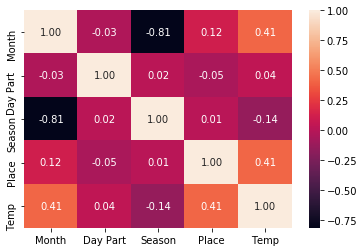

In [405]:
sns.heatmap(df_ml.corr(), annot=True, fmt=".2f");

Conclusion Four >>

As you can see, the temperature has a strong correlation compared to the month it is 0.41 and where the thermomentre is located 0,12.

======================================================================================================

Thank you !!